In [1]:
import pandas as pd

## Load data ##

In [7]:
data = pd.read_excel(
    "C:\\Users\\artus\\Credit scoring\\credit_scoring\\dataproject2024.xlsx"
)
data.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


In [8]:
data.columns

Index(['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount',
       'Down payment', 'Loan duration', 'Monthly payment', 'Credit event',
       'Married', 'Homeowner', 'Default (y)', 'Pred_default (y_hat)', 'PD',
       'Group'],
      dtype='object')

## Step 1

Mean Squared Error du modèle de substitution : 0.030299016578028446


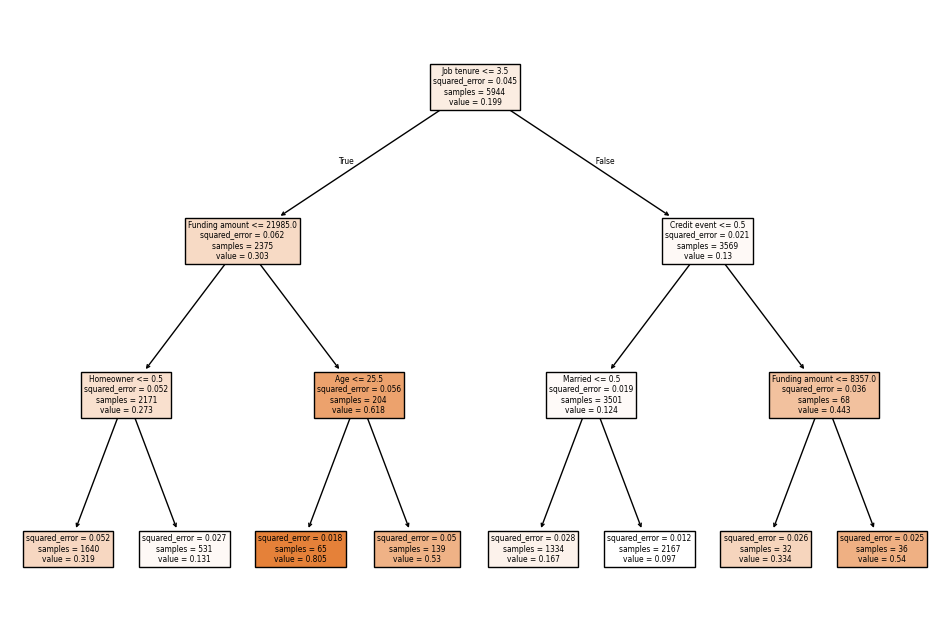

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

# Sélection des caractéristiques explicatives (features) et de la target (PD)
features = [
    "Job tenure",
    "Age",
    "Car price",
    "Funding amount",
    "Down payment",
    "Loan duration",
    "Monthly payment",
    "Credit event",
    "Married",
    "Homeowner",
]
X = data[features]
y = data["PD"]  # Probabilités prédites par le modèle blackbox

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Créer et entraîner un modèle de substitution (arbre de décision)
surrogate_model = DecisionTreeRegressor(max_depth=3, random_state=42)
surrogate_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = surrogate_model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error du modèle de substitution : {mse}")

# Visualisation de l'arbre de décision
plt.figure(figsize=(12, 8))
tree.plot_tree(surrogate_model, feature_names=features, filled=True)
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Créer et entraîner un modèle de régression linéaire comme surrogate model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = lin_model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error du modèle de régression linéaire : {mse}")

# Afficher les coefficients et l'intercept du modèle
coefficients = lin_model.coef_
intercept = lin_model.intercept_
print("Coefficients du modèle de régression linéaire :")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

print(f"Intercept : {intercept}")

Mean Squared Error du modèle de régression linéaire : 0.025293393693871583
Coefficients du modèle de régression linéaire :
Job tenure: -0.0029527098394816612
Age: -0.0012694661329718613
Car price: -2.1234549191916655e-05
Funding amount: 2.590229621233348e-05
Down payment: 0.08196826740258754
Loan duration: 0.0011416293444976196
Monthly payment: 0.29197392172564224
Credit event: 0.3154709464441223
Married: -0.07289169656527725
Homeowner: -0.06471448474951685
Intercept : 0.21603474373612597


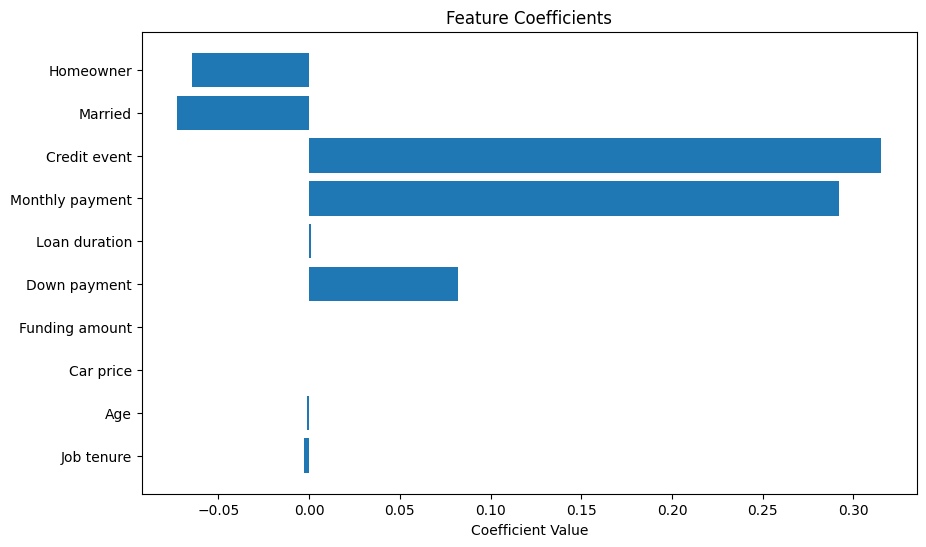

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Affichage des coefficients dans un bar chart horizontal
features = (
    X_train.columns
)  # Si tu utilises un DataFrame pandas, sinon remplace par la liste de tes features
coefficients = lin_model.coef_

# Création du graphique en barres horizontales
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(coefficients)), coefficients, align="center")
plt.yticks(np.arange(len(coefficients)), features)
plt.xlabel("Coefficient Value")
plt.title("Feature Coefficients")

# Affichage du graphique
plt.show()

## Step 2 ##